# Google Play Store Apps
## Web scraped data of 10k Play Store apps for analysing the Android market. 
[kaggle link](https://www.kaggle.com/lava18/google-play-store-apps)

In [2]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Смотрим на данные

In [5]:
# считываем данные
df_ps = pd.read_csv('https://raw.githubusercontent.com/h123a456rr789y/Machine_Learning/0075d2990f04addd0315b3ac9a9b9a32058746bb/HW1/GOOGLEPLAY/origin_data/googleplaystore.csv')

In [6]:
# размер датасета
df_ps.shape

(10841, 13)

In [7]:
# первые 5 строк датасета
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Описание данных:**

* **[App](#App)** - название приложения
* **[Category](#Category)** - категория приложения
* **[Rating](#Rating)** - рейтинг приложения
* **[Reviews](#Reviews)** - кол-во пользовательских отзывов для приложения
* **[Size](#Size)** - размер приложения
* **[Installs](#Installs)** - кол-во пользовательских загрузок для приложения
* **[Type](#Type)** - тип приложения (Paid / Free)
* **[Price](#Price)** - стоимость приложение
* **[Content Rating](#Content)** -возрастная группа на которую ориентировано приложение (Children / Mature 21+ / Adult)
* **[Genres](#Genres)** - жанры приложения
* **[Last Updated](#Last)** - дата последнего апдейта приложения
* **[Current Ver](#Current)** - текущая весия приложения
* **[Android Ver](#Android)** - минимально требуемая версия андроида 

In [8]:
# размер датасета
df_ps.shape

(10841, 13)

In [9]:
# базовые статистики
df_ps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# типы данных в колонках
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
# смотрим где есть нулевые значения
dt_1 = df_ps.isnull().sum()
dt_1 = pd.concat([dt_1, dt_1 / df_ps.shape[0]], axis=1, keys=['miss count', 'miss %']).sort_values(by=['miss count'], ascending=False)
dt_1

,miss count,miss %
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


### App - название приложения <a id='App'></a>

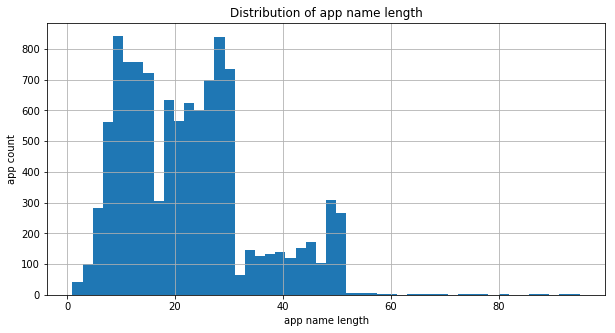

In [12]:
plt.figure(figsize=(10, 5))

plt.xlabel('app name length')
plt.ylabel('app count')
plt.title('Distribution of app name length')

dt1_1 = df_ps['App'].apply(lambda x: len(x))
dt1_1[dt1_1 <= 100].hist(bins=50);

In [13]:
dt1_1.describe()

count    10841.000000
mean        22.518956
std         12.358813
min          1.000000
25%         13.000000
50%         21.000000
75%         29.000000
max        194.000000
Name: App, dtype: float64

In [14]:
dt1_1[dt1_1 >= 100].count()

6

In [15]:
df_ps.iloc[dt1_1[dt1_1 >= 100].index.values]['App']

95      All of the parking lot - National Park applica...
220     104 Looking for a job - looking for a job, loo...
721     Japanese / English one-shop search dictionary ...
1451    591 housing transactions - renting houses, mid...
2466    Traditional Chinese Medicine Fangfang Liangfan...
3845    Truck Car Navi by Navitime Large size car, tra...
Name: App, dtype: object

Мы видим что в среднем длина названия приложения составляет 22.5 символа, тогда как медиана равна 21.
Из гисторграммы мы можем увидеть, что почти все распредление сосредоточено в интервале [5, 30] символов. 
Но есть и явные выбросы сдлинной названия >= 100 символов. 

### Category - категория приложения <a id='Category'></a>

In [16]:
df_ps['Category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

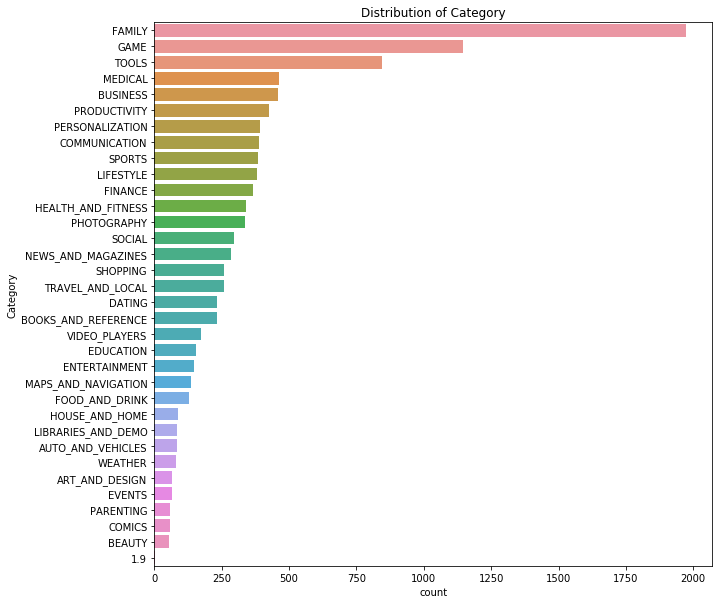

In [17]:
plt.figure(figsize=(10, 10))

plt.title('Distribution of Category')
sns.countplot(data=df_ps, y='Category', order=df_ps['Category'].value_counts().index);

In [18]:
# топ 10 самых популярных категорий
dt_1 = df_ps['Category'].value_counts()
dt_1 = pd.concat([dt_1, dt_1 / df_ps.shape[0]], axis=1, keys=['count', '%']).sort_values(by=['count'], ascending=False)
dt_1.head(10)

,count,%
FAMILY,1972,0.181902
GAME,1144,0.105525
TOOLS,843,0.077760
MEDICAL,463,0.042708
BUSINESS,460,0.042432
PRODUCTIVITY,424,0.039111
PERSONALIZATION,392,0.036159
COMMUNICATION,387,0.035698
SPORTS,384,0.035421
LIFESTYLE,382,0.035237


Как мы видим, FAMILY и GAME - наиболее популярные категории.

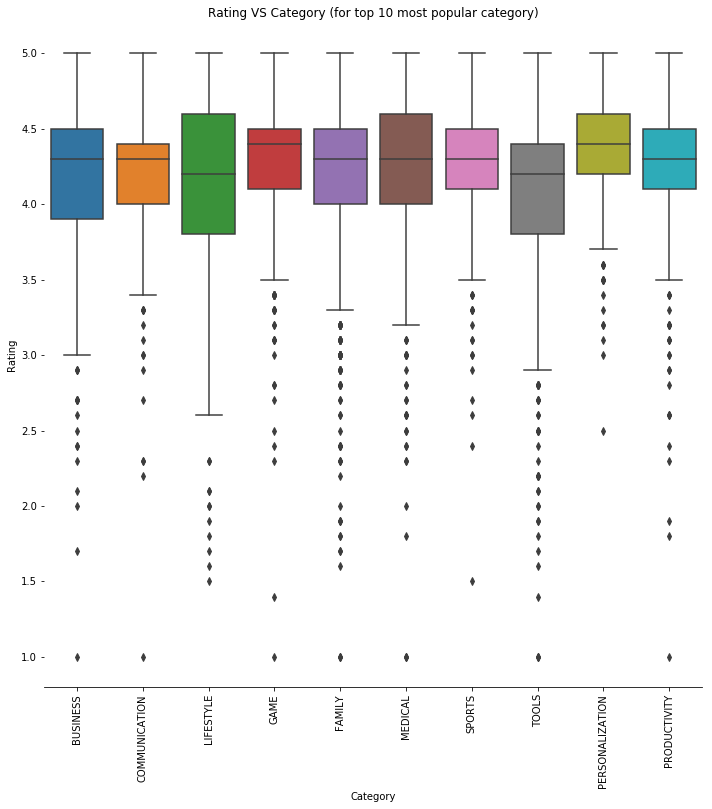

In [19]:
g = sns.catplot(
    data=df_ps[df_ps['Category'].isin(dt_1.head(10).index)], 
    x="Category",
    y="Rating",
    kind="box", 
    height = 10
)
g.despine(left=True)
g.set_xticklabels(rotation=90)

plt.title('Rating VS Category (for top 10 most popular category)');

Мы видим, что рейтинги в топ 10 категорий не столь сильно отличаются, но средний рейтинг у приложений в категории 

## Rating - рейтинг приложения <a id='Rating'></a>

In [20]:
df_ps['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

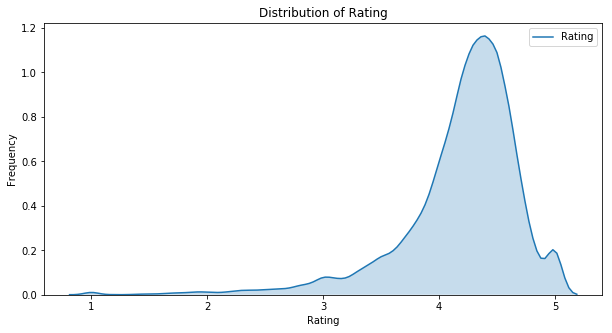

In [21]:
plt.figure(figsize=(10, 5))

plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

sns.kdeplot(df_ps[df_ps['Rating'] <= 7.5]['Rating'], shade=True);

In [22]:
df_ps[df_ps['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Среднее значение рейтинга приложения равно 4.2, медиана - 4.3. Но есть и явный выброс, приложение с рейтингом выше 5. Удалим эту строчку.

In [23]:
df_ps.drop(df_ps[df_ps['Rating'] > 5].index, inplace=True)

### Reviews - кол-во пользовательских отзывов для приложения <a id='Reviews'></a>

In [24]:
df_ps['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [25]:
# преобразуем в int
df_ps['Reviews'] = df_ps['Reviews'].apply(lambda x: int(x))

In [26]:
df_ps['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

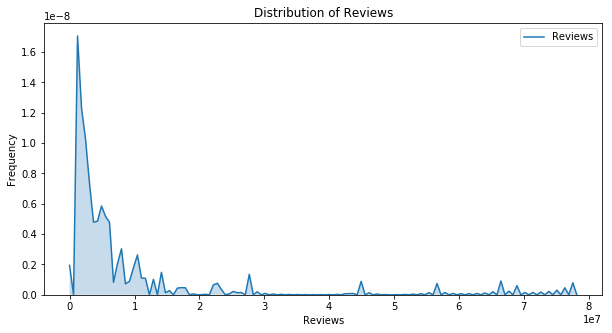

In [27]:
plt.figure(figsize=(10, 5))

plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')

sns.kdeplot(df_ps['Reviews'], shade=True);

In [28]:
df_ps[df_ps['Reviews'] > 4000000].shape[0]

291

In [29]:
df_ps[df_ps['Reviews'] > 4000000].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device


Мы видим, что среднее кол-во пользовательских отзывов для приложения равно 444к, медиана - 2к отзывов. Большинство приложений имееет кол-во отзывов меньше 2М. Но есть и некоторое кол-во известных приложений с большим числов отзывов.

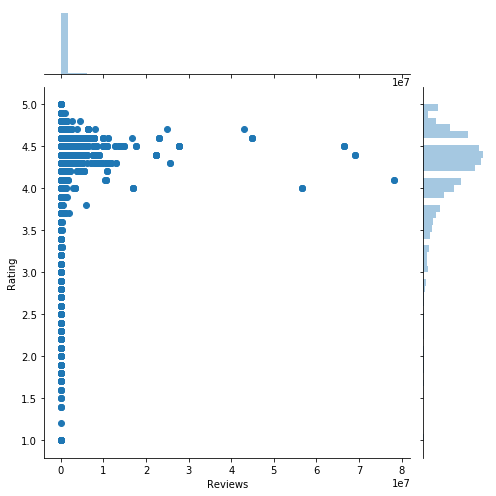

In [30]:
sns.jointplot(
    data=df_ps,
    x='Reviews', 
    y='Rating',
    height=7
);

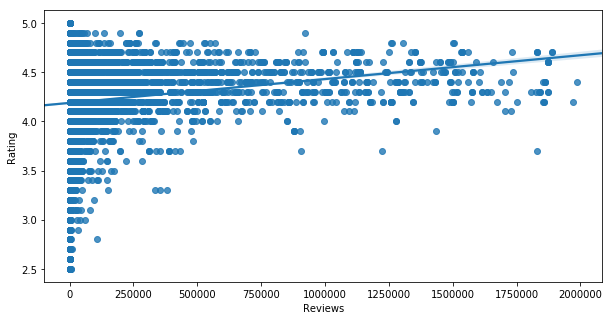

In [31]:
plt.figure(figsize=(10, 5))

sns.regplot(
    data=df_ps[(df_ps['Reviews'] < 2000000) & (df_ps['Rating'] >= 2.5)],
    x="Reviews", 
    y="Rating"
);

Видим, что чем больше рейтнинг тем больше отзывов, или наоборот.

### Size - размер приложения <a id='Size'></a>

In [32]:
df_ps['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [33]:
df_ps['Size'].value_counts().head(10)

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
Name: Size, dtype: int64

In [34]:
def some(size):
    
    if size == 'Varies with device':
        return np.nan
        
    if size.find('M') != -1:
        size =  float(size.replace('M', '')) * 10**6
    elif size.find('k') != -1:
        size =  float(size.replace('k', '')) * 10**3
    
    return size

In [35]:
df_ps['Size'] = df_ps['Size'].apply(lambda x: some(x))

In [36]:
df_ps['Size'].describe()

count    9.145000e+03
mean     2.151653e+07
std      2.258875e+07
min      8.500000e+03
25%      4.900000e+06
50%      1.300000e+07
75%      3.000000e+07
max      1.000000e+08
Name: Size, dtype: float64

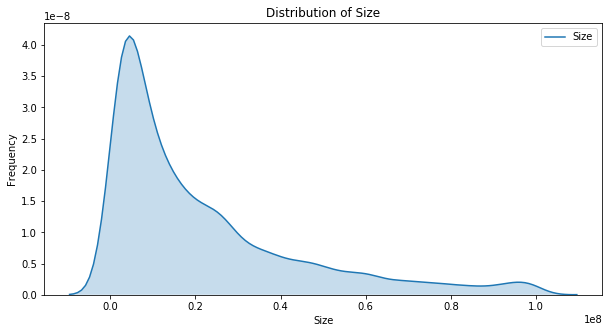

In [37]:
plt.figure(figsize=(10, 5))

plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

sns.kdeplot(df_ps['Size'], shade=True);

Видим, что средний размер приложения 21 мегабайта, медиана - 13 мегабайт.

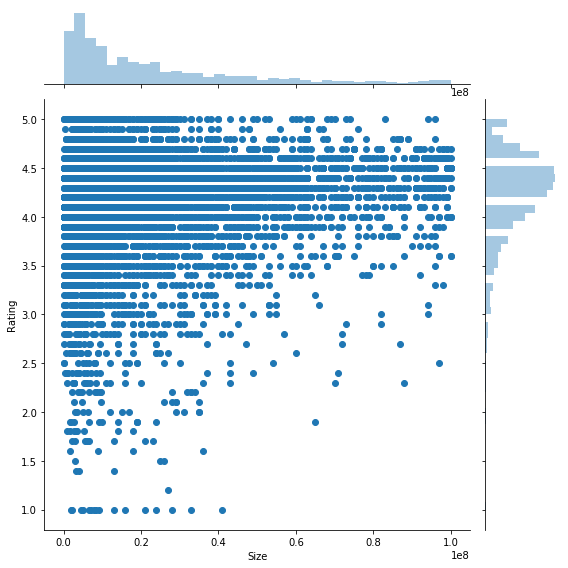

In [38]:
sns.jointplot(
    data=df_ps, 
    x='Size', 
    y='Rating',
    size = 8
);

### Installs - кол-во пользовательских загрузок для приложения <a id='Installs'></a>

In [39]:
df_ps['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [40]:
df_ps['Installs'].value_counts().head(10)

1,000,000+     1579
10,000,000+    1252
100,000+       1169
10,000+        1054
1,000+          907
5,000,000+      752
100+            719
500,000+        539
50,000+         479
5,000+          477
Name: Installs, dtype: int64

In [41]:
df_ps['Installs'] = df_ps['Installs'].apply(lambda x: x.replace(',',''))
df_ps['Installs'] = df_ps['Installs'].apply(lambda x: x.replace('+',''))
df_ps['Installs'] = df_ps['Installs'].apply(lambda x: int(x))

In [42]:
df_ps['Installs'].describe()

count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

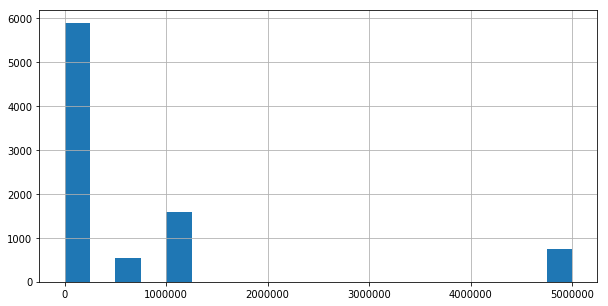

In [43]:
plt.figure(figsize=(10, 5))

df_ps[df_ps['Installs'] <= 5000000]['Installs'].hist(bins=20);

Мы видим, что среднее 15M скачиваний, медиана 100К.

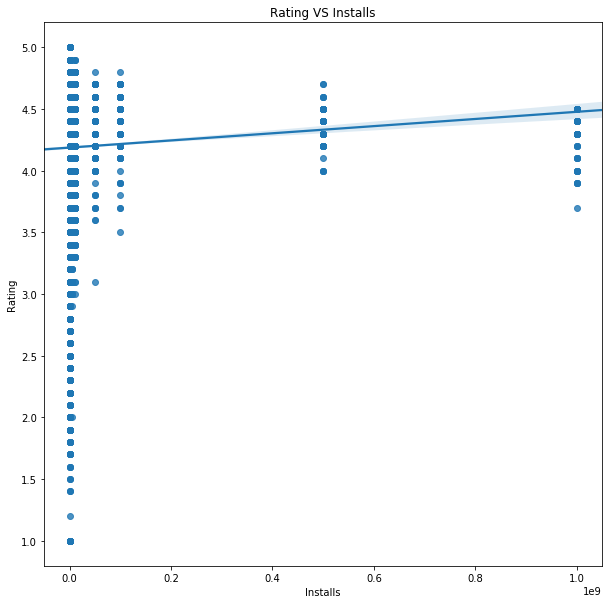

In [44]:
plt.figure(figsize = (10,10))

sns.regplot(
    data=df_ps,
    x="Installs", 
    y="Rating"
)

plt.title('Rating VS Installs');

Видим положительную корреляцию между рейтингом и кол-вом инсталлов.

### Type - тип приложения <a id='Type'></a>

In [45]:
df_ps['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [46]:
df_ps['Type'].value_counts(normalize=True)

Free    0.926192
Paid    0.073808
Name: Type, dtype: float64

Видим, что 92% приложений беспатные

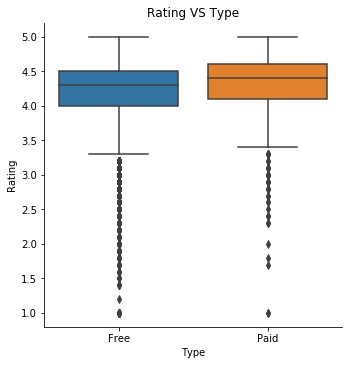

In [47]:
g = sns.catplot(
    data=df_ps, 
    x="Type",
    y="Rating",
    kind="box", 
    height=5
)

plt.title('Rating VS Type');

Видим, что у платных приложений чуть выше рейтинг. 

### Price - стоимость приложение <a id='Price'></a>

In [48]:
df_ps['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [49]:
df_ps['Price'] = df_ps['Price'].apply(lambda x: x.replace('$',''))
df_ps['Price'] = df_ps['Price'].apply(lambda x: float(x))

In [50]:
df_ps[df_ps['Price'] > 0]['Price'].describe()

count    800.000000
mean      13.920837
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

Средняя стоимость приложения, среди платных 13.9, медиана 2.9. Самое дорое приложение - 400.

In [51]:
df_ps[df_ps['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


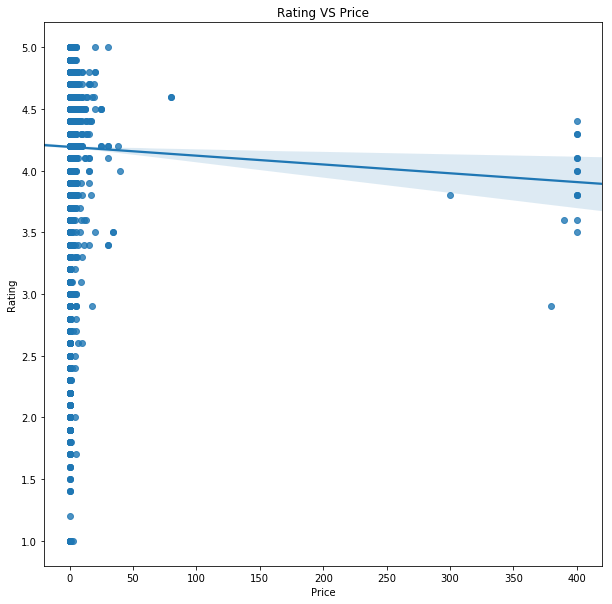

In [52]:
plt.figure(figsize = (10,10))

sns.regplot(
    data=df_ps,
    x="Price", 
    y="Rating"
)

plt.title('Rating VS Price');

Видим отрицательную корреляцию между ценой приложения и рейтингом приложения.

### Content Rating - возрастная группа на которую ориентировано приложение <a id='Content'></a>,

In [53]:
df_ps['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [54]:
df_ps['Content Rating'].value_counts(normalize=True)

Everyone           0.803875
Teen               0.111439
Mature 17+         0.046033
Everyone 10+       0.038192
Adults only 18+    0.000277
Unrated            0.000185
Name: Content Rating, dtype: float64

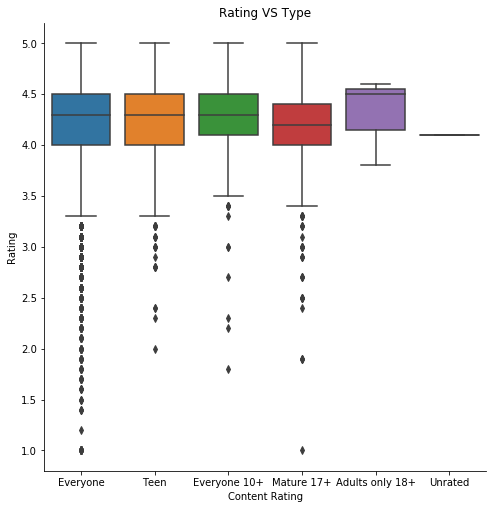

In [55]:
g = sns.catplot(
    data=df_ps, 
    x="Content Rating",
    y="Rating",
    kind="box", 
    height=7
)

plt.title('Rating VS Type');

Уровень рейтинга не очень зависит от возрастной группы на которую ориентировано приложение

In [56]:
df_ps[df_ps['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2500000.0,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


### Genres - жанры приложения <a id='Genres'></a>

In [57]:
df_ps['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [58]:
# топ 10 самых популярных жанров
dt_1 = df_ps['Genres'].value_counts()
dt_1 = pd.concat([dt_1, dt_1 / df_ps.shape[0]], axis=1, keys=['count', '%']).sort_values(by=['count'], ascending=False)
dt_1.head(10)

,count,%
Tools,842,0.077675
Entertainment,623,0.057472
Education,549,0.050646
Medical,463,0.042712
Business,460,0.042435
Productivity,424,0.039114
Sports,398,0.036716
Personalization,392,0.036162
Communication,387,0.035701
Lifestyle,381,0.035148


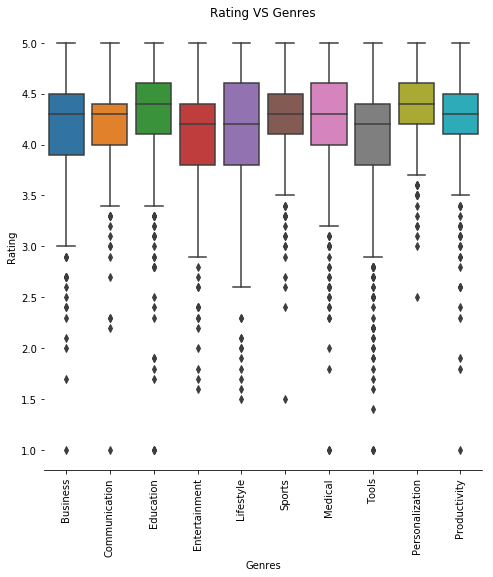

In [65]:
top_10 = dt_1.head(10).index.values

g = sns.catplot(
    data=df_ps[df_ps['Genres'].isin(top_10)], 
    x="Genres",
    y="Rating",
    kind="box", 
    height=7
)

g.despine(left=True)
g.set_xticklabels(rotation=90)

plt.title('Rating VS Genres');

Для топ 10 жанров средний рейтинг примерно одинаковый 

### Last Updated - дата последнего апдейта приложения <a id='Last'></a>

In [66]:
df_ps['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [100]:
df_ps['Last Updated'] = pd.to_datetime(df_ps['Last Updated'],format='%B %d, %Y')
df_ps['Last Updated Month'] = df_ps['Last Updated'].dt.to_period('M')

In [101]:
df_ps['Last Updated Month'].head()

0   2018-01
1   2018-01
2   2018-08
3   2018-06
4   2018-06
Name: Last Updated Month, dtype: object

In [105]:
df_ps['Last Updated Month'].value_counts().head(10)

2018-07    2864
2018-08    1275
2018-06    1006
2018-05     739
2018-04     429
2018-03     427
2018-02     307
2018-01     302
2017-12     252
2017-11     225
Freq: M, Name: Last Updated Month, dtype: int64

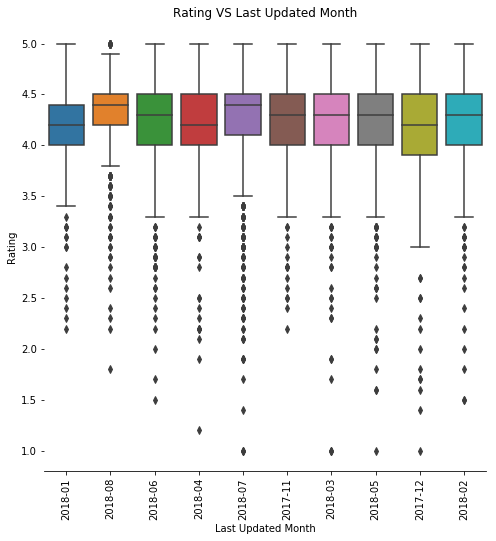

In [106]:
top_10 = df_ps['Last Updated Month'].value_counts().head(10).index.values

g = sns.catplot(
    data=df_ps[df_ps['Last Updated Month'].isin(top_10)], 
    x="Last Updated Month",
    y="Rating",
    kind="box", 
    height=7
)

g.despine(left=True)
g.set_xticklabels(rotation=90)

plt.title('Rating VS Last Updated Month');

В целом, рейтинг не очень зависит от времени апдейта.

### Current Ver - текущая весия приложения <a id='Current'></a>

In [108]:
df_ps['Current Ver'].value_counts().head(10)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
Name: Current Ver, dtype: int64

In [115]:
df_ps['Current Ver 2'] = df_ps[df_ps['Current Ver'] != 'Varies with device']['Current Ver'].apply(
    lambda x: '.'.join(str(x).split('.')[:2])
)

In [117]:
# топ 10 самых популярных версий
dt_1 = df_ps['Current Ver 2'].value_counts()
dt_1 = pd.concat([dt_1, dt_1 / df_ps.shape[0]], axis=1, keys=['count', '%']).sort_values(by=['count'], ascending=False)
dt_1.head(10)

,count,%
1.0,1649,0.152122
1.1,565,0.052122
1.2,424,0.039114
2.0,369,0.034041
1.3,280,0.025830
2.1,211,0.019465
1.4,206,0.019004
3.0,198,0.018266
1.5,171,0.015775
1.6,153,0.014114


Видим, что наиболее частая версия приложения это 1а-я

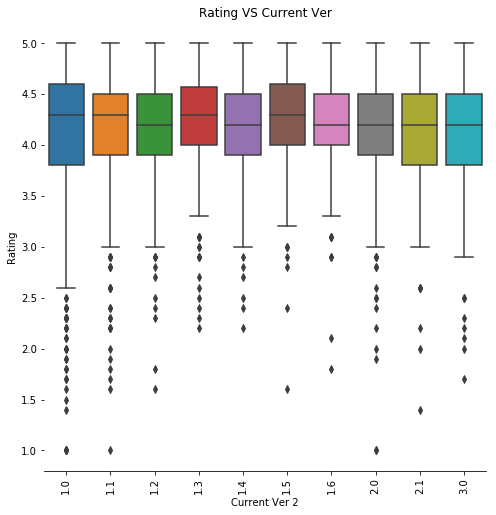

In [119]:
top_10 = df_ps['Current Ver 2'].value_counts().head(10).index.values

g = sns.catplot(
    data=df_ps[df_ps['Current Ver 2'].isin(top_10)], 
    x="Current Ver 2",
    y="Rating",
    kind="box", 
    height=7
)

g.despine(left=True)
g.set_xticklabels(rotation=90)

plt.title('Rating VS Current Ver');

Рейтинг не зависит от версии приложения

### Android Ver - минимально требуемая версия андроида <a id='Android'></a>

In [121]:
# топ 10 самых популярных версий андроида
dt_1 = df_ps['Android Ver'].value_counts()
dt_1 = pd.concat([dt_1, dt_1 / df_ps.shape[0]], axis=1, keys=['count', '%']).sort_values(by=['count'], ascending=False)
dt_1.head(10)

,count,%
4.1 and up,2451,0.226107
4.0.3 and up,1501,0.138469
4.0 and up,1375,0.126845
Varies with device,1362,0.125646
4.4 and up,980,0.090406
2.3 and up,652,0.060148
5.0 and up,601,0.055443
4.2 and up,394,0.036347
2.3.3 and up,281,0.025923
2.2 and up,244,0.022509


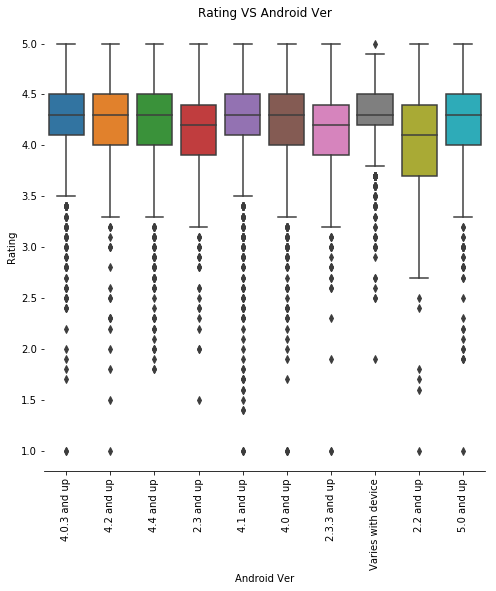

In [122]:
top_10 = df_ps['Android Ver'].value_counts().head(10).index.values

g = sns.catplot(
    data=df_ps[df_ps['Android Ver'].isin(top_10)], 
    x="Android Ver",
    y="Rating",
    kind="box", 
    height=7
)

g.despine(left=True)
g.set_xticklabels(rotation=90)

plt.title('Rating VS Android Ver');

Видим что старая версия Андроида 2.2 и выше наименее популярная